# Assignment 07 - Differential Privacy

Name: Marcel Zauder <br>
Matriculation number: 16-124-836

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [2]:
fake_data = pd.read_csv("ex05-fake-registrations.csv")
fake_data

Nachname       Vorname                             E-Mail   PLZ  \
0            Ali      Muhammad     muhammad.ali@students.unibe.ch  3270   
1        Althaus          Luca     luca.althaus@students.unibe.ch  4912   
2          Alpos       Orestis         orestis.alpos@inf.unibe.ch  3510   
3   Amores Sesar       Ignacio        ignacio.amores@inf.unibe.ch  3000   
4     Andreasyan         Narek          narek.andreasyan@unifr.ch  2500   
..           ...           ...                                ...   ...   
69       Würsten  Marcel Ernst  marcel.wuersten@students.unibe.ch  3792   
70      Zanolini          Luca         luca.zanolini@inf.unibe.ch  3456   
71        Zauder  Marcel Matti    marcel.zauder@students.unibe.ch  3770   
72        Zeiter      Sandrine           sandrine.zeiter@unifr.ch  3763   
73         Zuber     Joël Luca       joel.zuber@students.unibe.ch  3714   

                Ort   System  Semester  Points  
0           Aarberg  Android         5      89  
1         Aarwangen    MacOS         4      15  
2       Konolfingen  Android         3      77  
3              Bern      iOS         4      28  
4              Biel  Windows        10      31  
..              ...      ...       ...     ...  
69           Saanen    MacOS        11      75  
70     Trachselwald    Linux         8      56  
71    Obersimmental    MacOS        11      48  
72  Niedersimmental  Android         9      31  
73         Frutigen  Windows         3       2  

[74 rows x 8 columns]

In [3]:
ort = fake_data['Ort'].value_counts().to_frame()
ort

Ort
Trachselwald       4
Obersimmental      4
Interlaken         4
Oberhasli          4
Aarwangen          4
Saanen             4
Frutigen           4
Niedersimmental    4
Konolfingen        4
Thun               3
Seftigen           3
Burgdorf           3
Signau             3
Schwarzenburg      2
Aarberg            2
Courtelary         2
Laupen             2
Büren              2
La Neuveville      2
Biel               2
Moutier            2
Erlach             2
Nidau              2
Fraubrunnen        2
Wangen             2
Bern               2

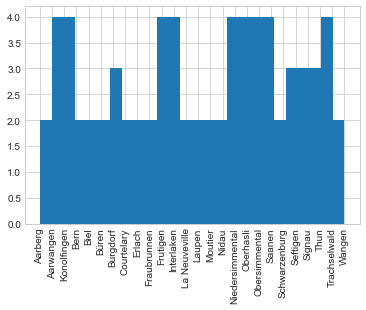

In [4]:
def plot_histogramm(data, bins):
    plt.xticks(rotation=90)
    plt.hist(data, bins = bins, label='Ort')
    
plot_histogramm(fake_data['Ort'], 26)

In [5]:
def add_noise(data, epsilon):
    laplace = lambda x : x + np.random.laplace(loc=0, scale=1/epsilon)
    
    newData = data.value_counts(sort = False).apply(laplace)
    return newData

In [6]:
def add_noise_points(data, epsilon, bins):
    laplace = lambda x : x + np.random.laplace(loc=0, scale=1/epsilon)
    newData = data.value_counts(bins = bins, sort=False).apply(laplace)
    return newData

# Attribute "Ort"

Text(0.5, 1.0, 'Epsilon = 2.0')

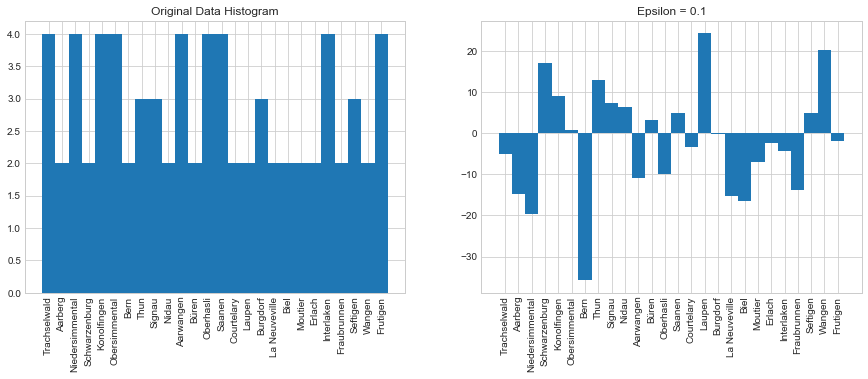

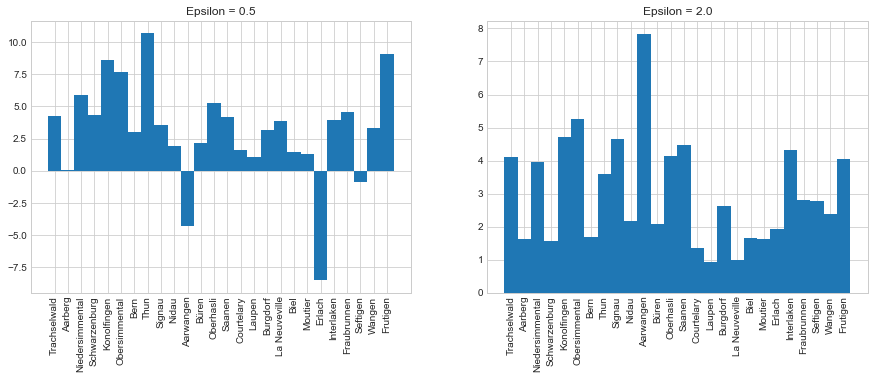

In [7]:
original = fake_data['Ort'].value_counts(sort = False)
small_eps = add_noise(fake_data['Ort'], 0.1)
medium_eps = add_noise(fake_data['Ort'], 0.5)
high_eps = add_noise(fake_data['Ort'], 2)

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.bar(original.keys(), original.values, 1)
ax2 = plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.bar(small_eps.keys(), small_eps.values, 1)

plt.figure(figsize=(15, 5))
ax3 = plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.bar(medium_eps.keys(), medium_eps.values, 1)
ax4 = plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.bar(high_eps.keys(), high_eps.values, 1)

ax1.set_title("Original Data Histogram")
ax2.set_title("Epsilon = 0.1")
ax3.set_title("Epsilon = 0.5")
ax4.set_title("Epsilon = 2.0")

# Attribute "System"

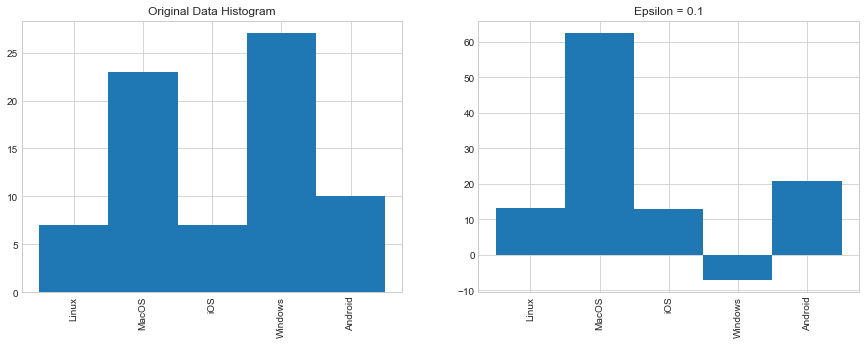

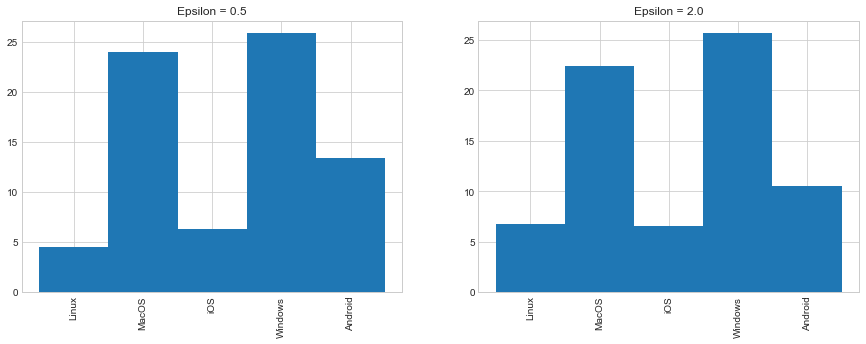

In [8]:
original = fake_data['System'].value_counts(sort = False)
small_eps = add_noise(fake_data['System'], 0.1)
medium_eps = add_noise(fake_data['System'], 0.5)
high_eps = add_noise(fake_data['System'], 2)

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.bar(original.keys(), original.values, 1)
ax2 = plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.bar(small_eps.keys(), small_eps.values, 1)

plt.figure(figsize=(15, 5))
ax3 = plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.bar(medium_eps.keys(), medium_eps.values, 1)
ax4 = plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.bar(high_eps.keys(), high_eps.values, 1)

ax1.set_title("Original Data Histogram")
ax2.set_title("Epsilon = 0.1")
ax3.set_title("Epsilon = 0.5")
ax4.set_title("Epsilon = 2.0")
plt.show()

# Attribute "Points"

Text(0.5, 1.0, 'Epsilon = 2.0')

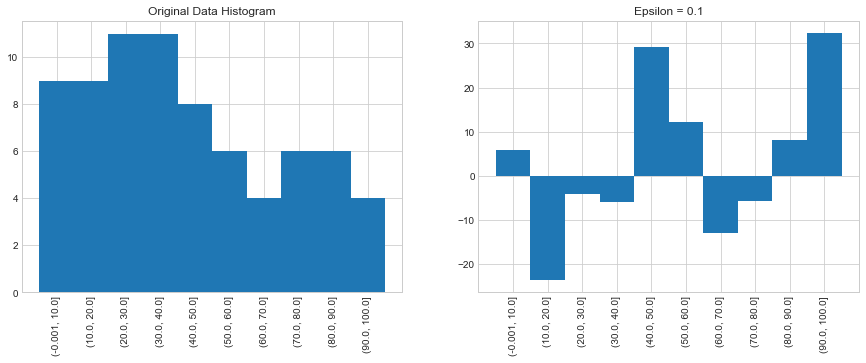

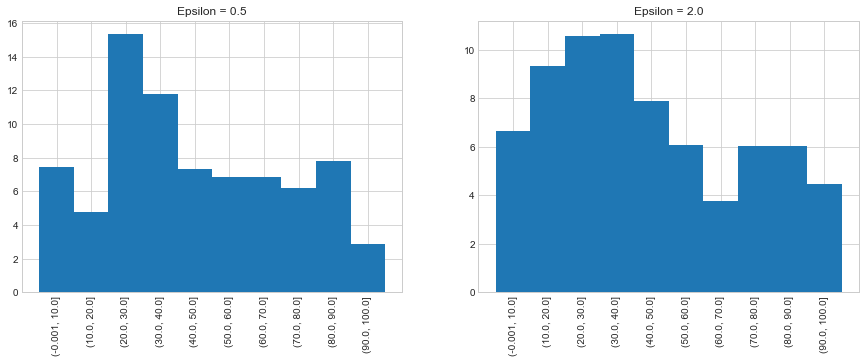

In [9]:
original = fake_data['Points'].value_counts(bins = [0,10,20,30,40,50,60,70,80,90,100], sort = False)
small_eps = add_noise_points(fake_data['Points'], 0.1, [0,10,20,30,40,50,60,70,80,90,100])
medium_eps = add_noise_points(fake_data['Points'], 0.5, [0,10,20,30,40,50,60,70,80,90,100])
high_eps = add_noise_points(fake_data['Points'], 2, [0,10,20,30,40,50,60,70,80,90,100])

plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.bar(original.keys().astype(str), original.values, 1)
ax2 = plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.bar(small_eps.keys().astype(str), small_eps.values, 1)

plt.figure(figsize=(15, 5))
ax3 = plt.subplot(1, 2, 1)
plt.xticks(rotation=90)
plt.bar(medium_eps.keys().astype(str), medium_eps.values, 1)
ax4 = plt.subplot(1, 2, 2)
plt.xticks(rotation=90)
plt.bar(high_eps.keys().astype(str), high_eps.values, 1)

ax1.set_title("Original Data Histogram")
ax2.set_title("Epsilon = 0.1")
ax3.set_title("Epsilon = 0.5")
ax4.set_title("Epsilon = 2.0")